In [125]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df = pd.read_csv('/content/drive/MyDrive/AI, Data Science & Analytics/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [128]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [131]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [136]:
df.dropna(how='any', inplace=True)

#fillna --> fill the missing values

In [137]:
len(df)

7032

In [138]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [139]:
df.Churn.value_counts()/len(df)*100

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

In [140]:
X=df.drop(['customerID', 'Churn'], axis=1)

In [141]:
y=df.Churn.values

In [83]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [142]:
y

array(['No', 'No', 'Yes', ..., 'No', 'Yes', 'No'], dtype=object)

In [143]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [144]:
# Convert categorical features to numericals --> Feature Encoding --> Dummy Encoding

X = pd.get_dummies(X, columns=['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], drop_first=True)

In [145]:
X.head(1)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [146]:
# Splitting the data into training & test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [147]:
len(X_train)

5274

In [148]:
len(X_test)

1758

In [149]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [150]:
X_train_sc

array([[ 2.27341616, -1.27787544,  0.15955118, ..., -0.52894845,
         1.40820157, -0.54096863],
       [-0.43986667, -0.09775325,  0.67357866, ..., -0.52894845,
         1.40820157, -0.54096863],
       [-0.43986667, -0.50469193, -1.45856106, ..., -0.52894845,
        -0.71012561,  1.84853602],
       ...,
       [-0.43986667, -0.38261033, -1.50318724, ...,  1.89054341,
        -0.71012561, -0.54096863],
       [ 2.27341616, -0.26052872,  0.46367033, ..., -0.52894845,
         1.40820157, -0.54096863],
       [-0.43986667,  1.61138924,  1.49998941, ..., -0.52894845,
         1.40820157, -0.54096863]])

In [151]:
X_test_sc

array([[-0.43986667,  0.47196092,  0.84712492, ..., -0.52894845,
        -0.71012561,  1.84853602],
       [-0.43986667, -1.11509996, -1.49492314, ..., -0.52894845,
         1.40820157, -0.54096863],
       [-0.43986667,  0.34987931, -1.45856106, ...,  1.89054341,
        -0.71012561, -0.54096863],
       ...,
       [ 2.27341616,  1.36722603,  0.51821344, ...,  1.89054341,
        -0.71012561, -0.54096863],
       [-0.43986667, -0.46399806, -1.48665903, ..., -0.52894845,
        -0.71012561,  1.84853602],
       [ 2.27341616,  0.26849157,  1.02067117, ..., -0.52894845,
        -0.71012561, -0.54096863]])

#### Decision Tree Classifier

In [156]:
# Call the DT Classifier
from sklearn.tree import DecisionTreeClassifier

# Initiating the classifier
model_dt = DecisionTreeClassifier(max_depth=2)

# Passing the data to classifier
model_dt.fit(X_train_sc, y_train)

DecisionTreeClassifier(max_depth=2)

In [157]:
y_pred_dt = model_dt.predict(X_test_sc)

In [158]:
# Classification metrics = to check how the model is behaving

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred_dt)*100)

78.61205915813424


### **Visualizing the Decision Tree**

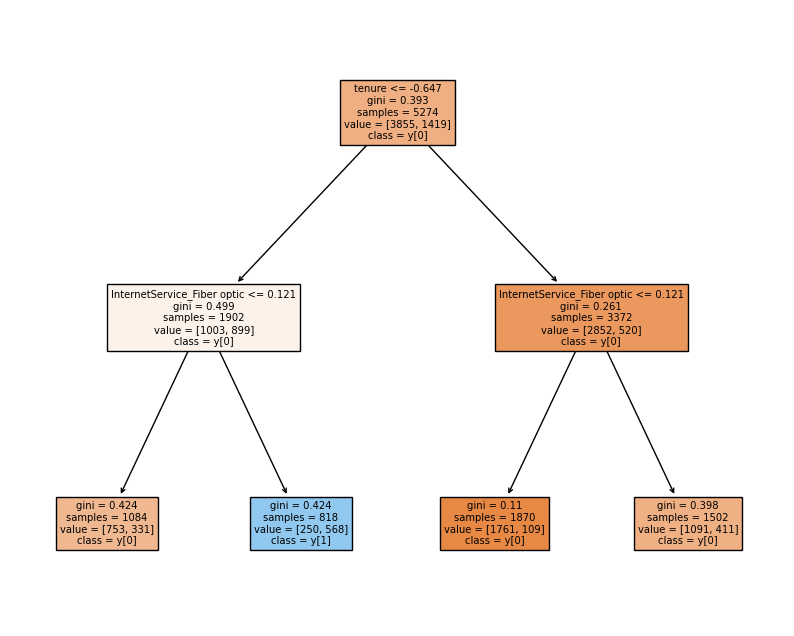

In [159]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plot_tree(model_dt, filled=True, feature_names =X_train.columns, class_names=True)
plt.show()

In [ ]:
#graphviz
#dtreeviz

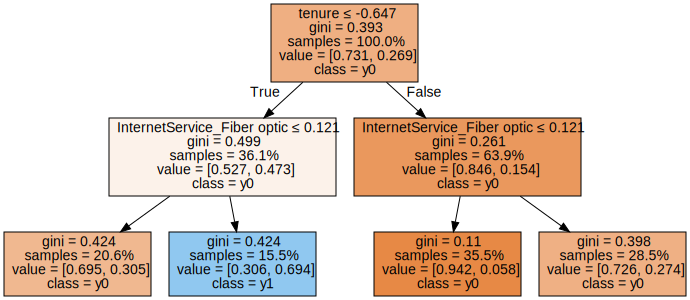

In [161]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model_dt, out_file="tree.dot", feature_names=X_train.columns, class_names=True, filled=True, proportion=True, special_characters=True)

with open("tree.dot") as f:
  dot_graph = f.read()
graph = graphviz.Source(dot_graph, format='png')
graph